In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import tqdm
import decoupler as dc
import numpy as np

In [2]:
protein_network_df = pd.read_csv('../../../protein_network_analysis/9606.protein.physical.links.v12.0.txt.gz', sep=' ')

In [3]:
protein_info = pd.read_csv('../../../protein_network_analysis/9606.protein.info.v12.0.txt.gz', sep='\t')
protein_info_dict = dict(zip(protein_info['#string_protein_id'], protein_info['preferred_name']))

In [4]:
protein_network_df['protein1_name'] = protein_network_df.protein1.map(protein_info_dict)

In [5]:
protein_network_df['protein2_name'] = protein_network_df.protein2.map(protein_info_dict)

In [6]:
cluster_index = ['TRNAU1AP', 'RBM5', 'HNRNPF', 'MBNL2', 'RNPS1', 'LSM1', 'PCBP1',
       'RBM10', 'SMNDC1', 'LSM10', 'LUC7L', 'RBM22', 'RBM42', 'CNOT2', 'RBM11',
       'YTHDF1', 'MBNL1', 'PCBP3', 'YWHAG', 'EIF4B', 'ZMAT3', 'STAU2', 'WDR6',
       'DZIP3', 'TPD52L2', 'GRB2', 'PPIA', 'ZC3HAV1', 'RPS19BP1', 'SRP68',
       'LGALS3', 'RBM4', 'HNRNPH2', 'PARN', 'RBM14', 'PPP1CA', 'SCAF8',
       'NUDT21', 'CPSF6']

In [7]:
interest=cluster_index.copy()

In [8]:
interactors_dict = protein_network_df[protein_network_df['protein1_name'].isin(interest)].groupby('protein1_name')['protein2_name'].apply(list).to_dict()

In [9]:
msigdb = dc.get_resource('MSigDB')
msigdb

/tscc/nfs/home/pjaganna1/anaconda3/envs/decoupler/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [10]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='go_biological_process']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

msigdb

,genesymbol,collection,geneset
33,MAFF,go_biological_process,GOBP_EMBRYO_DEVELOPMENT
44,MAFF,go_biological_process,GOBP_POSITIVE_REGULATION_OF_RNA_METABOLIC_PROCESS
82,MAFF,go_biological_process,GOBP_REGULATION_OF_EPITHELIAL_CELL_DIFFERENTIA...
94,MAFF,go_biological_process,GOBP_EMBRYO_DEVELOPMENT_ENDING_IN_BIRTH_OR_EGG...
108,MAFF,go_biological_process,GOBP_IN_UTERO_EMBRYONIC_DEVELOPMENT
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [11]:
msigdb.loc[:, 'geneset'] = [name.split('GOBP_')[1] for name in msigdb['geneset']]
msigdb

,genesymbol,collection,geneset
33,MAFF,go_biological_process,EMBRYO_DEVELOPMENT
44,MAFF,go_biological_process,POSITIVE_REGULATION_OF_RNA_METABOLIC_PROCESS
82,MAFF,go_biological_process,REGULATION_OF_EPITHELIAL_CELL_DIFFERENTIATION
94,MAFF,go_biological_process,EMBRYO_DEVELOPMENT_ENDING_IN_BIRTH_OR_EGG_HATC...
108,MAFF,go_biological_process,IN_UTERO_EMBRYONIC_DEVELOPMENT
...,...,...,...
3838543,PRAMEF22,go_biological_process,POSITIVE_REGULATION_OF_CELL_POPULATION_PROLIFE...
3838544,PRAMEF22,go_biological_process,APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [12]:
r_list = []
num_top_terms = []
terms = []
go_pvals = pd.DataFrame()
for rbp in tqdm.tqdm(cluster_index):
    r_list.append(rbp)

    
    top_genes = pd.DataFrame(interactors_dict[rbp]).copy()
    top_genes = top_genes.rename(columns={0: 'gene_name'})
    top_genes = top_genes.set_index('gene_name')
    top_genes['group'] = 'interactor'
    
    # Run ora
    enr_pvals = dc.get_ora_df(
        df=top_genes,
        net=msigdb,
        source='geneset',
        target='genesymbol'
    )
    
    total_num_terms = enr_pvals[enr_pvals['FDR p-value']<0.05].shape[0]
    top_pct = int(0.01*total_num_terms)
    enr_pvals['-log10 FDR p-value'] = -np.log10(enr_pvals['FDR p-value'])
    print(rbp, top_genes.shape[0], enr_pvals[enr_pvals['FDR p-value']<0.05].shape[0])
    keep_term = enr_pvals[enr_pvals['FDR p-value']<0.05].sort_values(by=['-log10 FDR p-value', 'Combined score'],ascending=[False, False]).head(10)
    terms += keep_term['Term'].tolist()
    num_top_terms.append(enr_pvals[enr_pvals['FDR p-value']<0.05].shape[0])
    keep_term['RBP'] = rbp
    go_pvals = pd.concat([keep_term
                          ,go_pvals])

  3%|▎         | 1/39 [00:00<00:22,  1.72it/s]

TRNAU1AP 80 78


  5%|▌         | 2/39 [00:01<00:21,  1.74it/s]

RBM5 107 121


  8%|▊         | 3/39 [00:01<00:20,  1.72it/s]

HNRNPF 296 556


 10%|█         | 4/39 [00:02<00:20,  1.74it/s]

MBNL2 17 35


 13%|█▎        | 5/39 [00:02<00:19,  1.73it/s]

RNPS1 233 198


 15%|█▌        | 6/39 [00:03<00:19,  1.73it/s]

LSM1 156 140


 18%|█▊        | 7/39 [00:04<00:18,  1.71it/s]

PCBP1 343 721


 21%|██        | 8/39 [00:04<00:18,  1.70it/s]

RBM10 168 248


 23%|██▎       | 9/39 [00:05<00:17,  1.72it/s]

SMNDC1 77 34


 26%|██▌       | 10/39 [00:05<00:16,  1.73it/s]

LSM10 157 74


 28%|██▊       | 11/39 [00:06<00:16,  1.73it/s]

LUC7L 195 88


 31%|███       | 12/39 [00:06<00:15,  1.72it/s]

RBM22 196 111


 33%|███▎      | 13/39 [00:07<00:15,  1.71it/s]

RBM42 320 177


 36%|███▌      | 14/39 [00:08<00:14,  1.72it/s]

CNOT2 176 148


 38%|███▊      | 15/39 [00:08<00:13,  1.73it/s]

RBM11 104 81


 41%|████      | 16/39 [00:09<00:13,  1.72it/s]

YTHDF1 185 264


 44%|████▎     | 17/39 [00:09<00:12,  1.73it/s]

MBNL1 68 90


 46%|████▌     | 18/39 [00:10<00:12,  1.73it/s]

PCBP3 80 127


 49%|████▊     | 19/39 [00:11<00:11,  1.70it/s]

YWHAG 711 1182


 51%|█████▏    | 20/39 [00:11<00:11,  1.70it/s]

EIF4B 215 366


 54%|█████▍    | 21/39 [00:12<00:10,  1.72it/s]

ZMAT3 24 135


 56%|█████▋    | 22/39 [00:12<00:09,  1.72it/s]

STAU2 141 238


 59%|█████▉    | 23/39 [00:13<00:09,  1.71it/s]

WDR6 112 484


 62%|██████▏   | 24/39 [00:13<00:08,  1.71it/s]

DZIP3 65 162


 64%|██████▍   | 25/39 [00:14<00:08,  1.72it/s]

TPD52L2 63 8


 67%|██████▋   | 26/39 [00:15<00:07,  1.68it/s]

GRB2 835 2202


 69%|██████▉   | 27/39 [00:15<00:07,  1.60it/s]

PPIA 314 917


 72%|███████▏  | 28/39 [00:16<00:06,  1.62it/s]

ZC3HAV1 412 265


 74%|███████▍  | 29/39 [00:17<00:06,  1.65it/s]

RPS19BP1 109 75


 77%|███████▋  | 30/39 [00:17<00:05,  1.67it/s]

SRP68 333 164


 79%|███████▉  | 31/39 [00:18<00:04,  1.66it/s]

LGALS3 371 1597


 82%|████████▏ | 32/39 [00:18<00:04,  1.67it/s]

RBM4 189 194


 85%|████████▍ | 33/39 [00:19<00:03,  1.68it/s]

HNRNPH2 220 496


 87%|████████▋ | 34/39 [00:19<00:02,  1.70it/s]

PARN 106 261


 90%|████████▉ | 35/39 [00:20<00:02,  1.69it/s]

RBM14 330 725


 92%|█████████▏| 36/39 [00:21<00:01,  1.66it/s]

PPP1CA 582 923


 95%|█████████▍| 37/39 [00:21<00:01,  1.68it/s]

SCAF8 75 111


 97%|█████████▋| 38/39 [00:22<00:00,  1.69it/s]

NUDT21 202 365


100%|██████████| 39/39 [00:22<00:00,  1.70it/s]

CPSF6 391 362


In [13]:
go_pvals_all_top_terms = pd.DataFrame()
for rbp in tqdm.tqdm(cluster_index):
    r_list.append(rbp)
    
    top_genes = pd.DataFrame(interactors_dict[rbp]).copy()
    top_genes = top_genes.rename(columns={0: 'gene_name'})
    top_genes = top_genes.set_index('gene_name')
    top_genes['group'] = 'interactor'
    
    # Run ora
    enr_pvals = dc.get_ora_df(
        df=top_genes,
        net=msigdb,
        source='geneset',
        target='genesymbol'
    )
    
    enr_pvals['-log10 FDR p-value'] = -np.log10(enr_pvals['FDR p-value'])
    enr_pvals = enr_pvals[enr_pvals['FDR p-value'] <0.05]
    all_term = enr_pvals[enr_pvals['Term'].isin(terms)]
    all_term['RBP'] = rbp
    
    go_pvals_all_top_terms = pd.concat([all_term
                          ,go_pvals_all_top_terms])

  0%|          | 0/39 [00:00<?, ?it/s]/scratch/pjaganna1/job_7118577/ipykernel_3900067/1590151308.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_term['RBP'] = rbp
  3%|▎         | 1/39 [00:00<00:21,  1.77it/s]/scratch/pjaganna1/job_7118577/ipykernel_3900067/1590151308.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_term['RBP'] = rbp
  5%|▌         | 2/39 [00:01<00:21,  1.76it/s]/scratch/pjaganna1/job_7118577/ipykernel_3900067/1590151308.py:21: SettingWithCopyWarning: 
A value is trying to

In [14]:
go_pvals_all_top_terms.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features,-log10 FDR p-value,RBP
45,ALTERNATIVE_MRNA_SPLICING_VIA_SPLICEOSOME,72,0.430556,3.457890e-34,7.283798e-32,24.018279,1850.541994,CELF1;DDX17;DDX5;DHX9;FXR1;FXR2;HNRNPA0;HNRNPA...,31.137642,CPSF6
47,AMIDE_BIOSYNTHETIC_PROCESS,853,0.043376,5.372026e-06,1.200159e-04,2.373141,28.796420,CELF1;DAZL;DHX9;EIF4A3;EIF5A;ELAVL1;FXR1;FXR2;...,3.920761,CPSF6
49,AMIDE_METABOLIC_PROCESS,1140,0.036842,6.120951e-05,1.014083e-03,2.010943,19.508572,CELF1;DAZL;DHX9;EIF4A3;EIF5A;ELAVL1;FXR1;FXR2;...,2.993926,CPSF6
109,BIOLOGICAL_PROCESS_INVOLVED_IN_INTERSPECIES_IN...,1646,0.033414,6.258223e-05,1.030254e-03,1.838606,17.795924,ADAR;AKAP8;AKIRIN2;ALYREF;BCR;CCNT1;CDC73;CHMP...,2.987056,CPSF6
192,CELLULAR_MACROMOLECULE_BIOSYNTHETIC_PROCESS,1149,0.033072,1.104151e-03,1.214978e-02,1.786110,12.161050,ALG13;CELF1;DAZL;DHX9;EIF4A3;EIF5A;ELAVL1;FXR1...,1.915431,CPSF6


In [15]:
go_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features,-log10 FDR p-value,RBP
943,MRNA_PROCESSING,465,0.395699,1.538130e-204,4.535944e-201,37.314972,17511.796455,ACIN1;ADAR;AKAP17A;ALYREF;AQR;ARL6IP4;BCAS2;BU...,200.343332,CPSF6
940,MRNA_METABOLIC_PROCESS,706,0.277620,7.203118e-184,1.062100e-180,27.449672,11575.557956,ACIN1;ADAR;AKAP17A;ALYREF;AQR;ARL6IP4;ATXN2L;B...,179.973835,CPSF6
2683,RNA_PROCESSING,935,0.213904,3.428595e-163,3.370309e-160,21.337818,7982.247678,ACIN1;ADAR;AKAP17A;ALYREF;AQR;ARL6IP4;BCAS2;BU...,159.472330,CPSF6
2685,RNA_SPLICING,432,0.347222,6.002141e-153,4.425079e-150,28.196213,9882.868765,ACIN1;AKAP17A;ALYREF;AQR;ARL6IP4;BCAS2;BUD13;C...,149.354079,CPSF6
2687,RNA_SPLICING_VIA_TRANSESTERIFICATION_REACTIONS,295,0.427119,1.299003e-140,7.661517e-138,31.772835,10234.040356,ALYREF;AQR;BCAS2;BUD13;CDC40;CDC5L;CELF1;CRNKL...,137.115685,CPSF6


In [16]:
go_pvals_copy = go_pvals.copy()

In [17]:
go_pvals_all_top_terms_copy = go_pvals_all_top_terms.copy()

In [18]:
import pickle

In [19]:
### Dictionary with broader categorization of functional terms
with open('../functional_groups_dictionary_interactor_analysis.pkl', 'rb') as file:
    functional_groups = pickle.load(file)

In [20]:
functional_groups.keys()

dict_keys(['Cytoskeleton and Cell Structure', 'Cell Cycle and Division', 'Gene Expression and RNA Processing', 'Ribosome and Translation Biogenesis', 'Metabolism and Biosynthesis', 'Signal Transduction and Regulation', 'Immune and Inflammatory Response', 'Cellular Response to Stimuli', 'Protein Modification and Degradation', 'Apoptosis and Cell Death', 'Transport and Localization', 'Development and Morphogenesis'])

In [21]:
def assign_larger_function(df):
    for key in functional_groups:
        if df.Term in functional_groups[key]:
            return key
            

In [22]:
go_pvals_copy['Functional_group'] = go_pvals_copy.apply(assign_larger_function, axis=1)

In [23]:
go_pvals_copy = go_pvals_copy.set_index('RBP')

In [24]:
go_pvals_all_top_terms_copy['Functional_group'] = go_pvals_all_top_terms_copy.apply(assign_larger_function, axis=1)

In [25]:
go_pvals_all_top_terms_copy = go_pvals_all_top_terms_copy.set_index('RBP')

In [26]:
term_to_group = dict(zip(go_pvals_copy.Term, go_pvals_copy.Functional_group))

In [29]:
### labeled according to the clustering analysis
cluster_index_dict = {'HNRNPF': '1', 'NUDT21': '5', 'MBNL2': '1', 'TRNAU1AP': '1', 'RBM5': '1', 
                      'PPIA': '3', 'CPSF6': '6', 'ZC3HAV1': '3', 'SRP68': '3', 'LGALS3': '3', 
                      'RPS19BP1': '3', 'RBM4': '3', 'TPD52L2': '3', 'HNRNPH2': '3', 'GRB2': '3', 
                      'RBM14': '4', 'PCBP3': '3', 'YWHAG': '3', 'PPP1CA': '4', 'YTHDF1': '3', 'CNOT2': 
                      '3', 'MBNL1': '3', 'LSM1': '2', 'SCAF8': '4', 'RBM11': '3', 'LUC7L': '2', 'LSM10': '2',
                      'PCBP1': '2', 'EIF4B': '3', 'ZMAT3': '3', 'RBM22': '2', 'RBM42': '2', 'WDR6': '3', 'STAU2': '3', 
                      'RBM10': '2', 'PARN': '4', 'DZIP3': '3', 'SMNDC1': '2', 'RNPS1': '2'}

In [ ]:
cluster_index_dict

In [30]:
to_plot = go_pvals_copy.copy()
to_plot['cluster_id'] = to_plot.index.map(cluster_index_dict)


In [31]:
to_plot_all_terms = go_pvals_all_top_terms_copy.copy()
to_plot_all_terms['cluster_id'] = to_plot_all_terms.index.map(cluster_index_dict)


In [33]:
def build_scatterplot_swapped(df, metric='Overlap ratio', savefig=False):
    # 1) Row order (y-axis): RBPs grouped by cluster
    # y_order = (
    #     pd.DataFrame({'RBP': list({*df.RBP})})
    #       .assign(cluster_id=lambda x: x.RBP.map(cluster_index_dict))
    #       .sort_values(['cluster_id','RBP'], ascending=[True, True]).RBP
    #       .tolist()
    # )[::-1]
    y_order = cluster_index[::-1].copy()
    
    # 2) Column order (x-axis): Terms grouped by functional group
    term_stats = (df.groupby(['Term','Functional_group'])[metric]
                    .mean()
                    .reset_index(name='mean_overlap'))
    x_order = (term_stats.sort_values(['Functional_group','mean_overlap'], 
                                      ascending=[True, False])['Term']
                        .drop_duplicates().tolist())
    
    # --- enforce categorical order ---
    df = df.copy()
    df['RBP'] = pd.Categorical(df['RBP'], categories=y_order, ordered=True)
    df['Term'] = pd.Categorical(df['Term'], categories=x_order, ordered=True)
    df['cluster_id'] = df['RBP'].map(cluster_index_dict)

    # 3) Cluster colors for RBPs (y-axis groups)
    row_clusters = pd.Series([cluster_index_dict[i] for i in y_order], 
                              index=y_order, name='cluster_id')
    unique_clusters = sorted(row_clusters.unique())
    cluster_palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
    cluster_color_map = {cid: cluster_palette[i] for i, cid in enumerate(['3', '6', '1', '4', '2', '5'])}

    # 4) Column groups for Terms (x-axis groups)
    col_groups = pd.Series([term_to_group[t] for t in x_order], 
                           index=x_order, name='Functional_group')
    unique_groups = pd.unique(col_groups)
    group_palette = sns.color_palette("Set2", n_colors=len(unique_groups))
    group_color_map = {g: group_palette[i] for i, g in enumerate(unique_groups)}
    col_colors = col_groups.map(group_color_map)

    # 5) Scatterplot
    plt.figure(figsize=(3.5, 8))
    g = sns.scatterplot(
        data=df,
        x='Term',
        y='RBP',
        size=np.log10(df[metric]),   # +1 avoids log(0)
        hue='cluster_id',
        hue_order=['3', '6', '1', '4', '2', '5'],
        palette=cluster_color_map,
        linewidth=0,
        alpha=0.5
    )
    
    # enforce order
    g.set_xlim(-0.5, len(x_order)-0.5)
    g.set_ylim(-0.5, len(y_order)-0.5)

    # Hide tick labels
    g.set_xticks(range(len(x_order)))
    g.set_xticklabels([], rotation=90)  # no term labels
    g.set_yticks(range(len(y_order)))
    #g.set_yticklabels([])               # no RBP labels

    g.set_xlabel("")
    if savefig ==True:
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_scatter_no_grouping.png')
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_scatter_no_grouping.svg')
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_scatter_no_grouping.jpg')



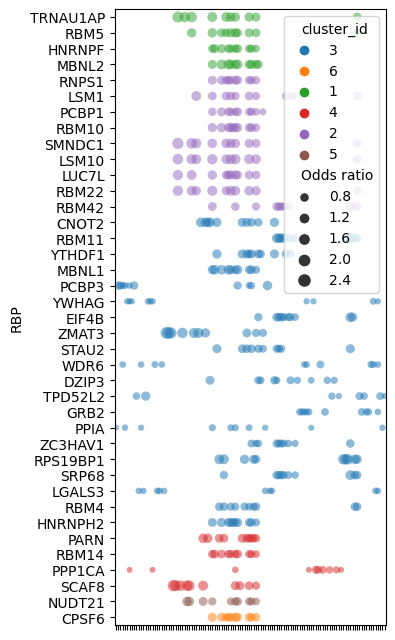

In [34]:
build_scatterplot_swapped(to_plot.reset_index(), 'Odds ratio', True)

In [35]:
import matplotlib.patches as mpatches
import matplotlib as mpl
def build_heatmap_swapped(df, metric='Overlap ratio', savefig=False):
    # 1) Row order (y-axis): RBPs grouped by cluster
    y_order = (
        pd.DataFrame({'RBP': list({*df.RBP})})
          .assign(cluster_id=lambda x: x.RBP.map(cluster_index_dict))
          .sort_values(['cluster_id','RBP'], ascending=[True, True]).RBP
          .tolist()
    )[::-1]
    
    # 2) Column order (x-axis): Terms grouped by functional group
    term_stats = (df.groupby(['Term','Functional_group'])[metric]
                    .mean()
                    .reset_index(name='mean_overlap'))
    x_order = (term_stats.sort_values(['Functional_group','mean_overlap'], 
                                      ascending=[True, False])['Term']
                        .drop_duplicates().tolist())
    
    # --- enforce categorical order ---
    df = df.copy()
    df['RBP'] = pd.Categorical(df['RBP'], categories=y_order, ordered=True)
    df['Term'] = pd.Categorical(df['Term'], categories=x_order, ordered=True)
    df['cluster_id'] = df['RBP'].map(cluster_index_dict)
     # 3) Pivot: rows=RBP, cols=Term
    mat = (df.pivot_table(index='RBP', columns='Term', values=metric, aggfunc='mean')
             .reindex(index=y_order, columns=x_order)
             .fillna(0.0))

    # 3) Cluster colors for RBPs (y-axis groups)
    row_clusters = pd.Series([cluster_index_dict[i] for i in y_order], 
                              index=y_order, name='cluster_id')
    unique_clusters = sorted(row_clusters.unique())
    cluster_palette = sns.color_palette("tab10", n_colors=len(unique_clusters))
    cluster_color_map = {cid: cluster_palette[i] for i, cid in enumerate(unique_clusters)}

    # 4) Column groups for Terms (x-axis groups)
    col_groups = pd.Series([term_to_group[t] for t in x_order], 
                           index=x_order, name='Functional_group')
    unique_groups = pd.unique(col_groups)
    group_palette = sns.color_palette("Set3", n_colors=len(unique_groups))
    group_color_map = {g: group_palette[i] for i, g in enumerate(unique_groups)}
    col_colors = col_groups.map(group_color_map)

    # 5) Scatterplot
    g = sns.clustermap(
        np.log10(mat + 1),   # +1 avoids log(0)
        row_cluster=False,
        col_cluster=False,
        col_colors=col_colors,
        cmap='Blues',
        figsize=(7,16),
        cbar_pos=None

    )
    
    # Hide x-term labels for cleaner look
    g.ax_heatmap.set_xticklabels([])
    g.ax_heatmap.set_yticklabels([])
    g.ax_heatmap.set_xlabel("")
    # add functional group color bar (columns)

    # --- Legends ---
    # cluster legend (row colors)
   
    # functional group legend (col colors)
    group_handles = [
        mpatches.Patch(color=group_color_map[g], label=g)
        for g in unique_groups
    ]

    g.ax_heatmap.legend(
        handles=group_handles,
        title="Functional Groups",
        bbox_to_anchor=(1.05, 0.7),
        loc='upper left',
        frameon=False
    )

    if savefig ==True:
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_heatmap_no_grouping.png')
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_heatmap_no_grouping.svg')
        plt.savefig('Jaccard_cluster_decoupler_noproteinlen_heatmap_no_grouping.jpg')
    
    plt.show()



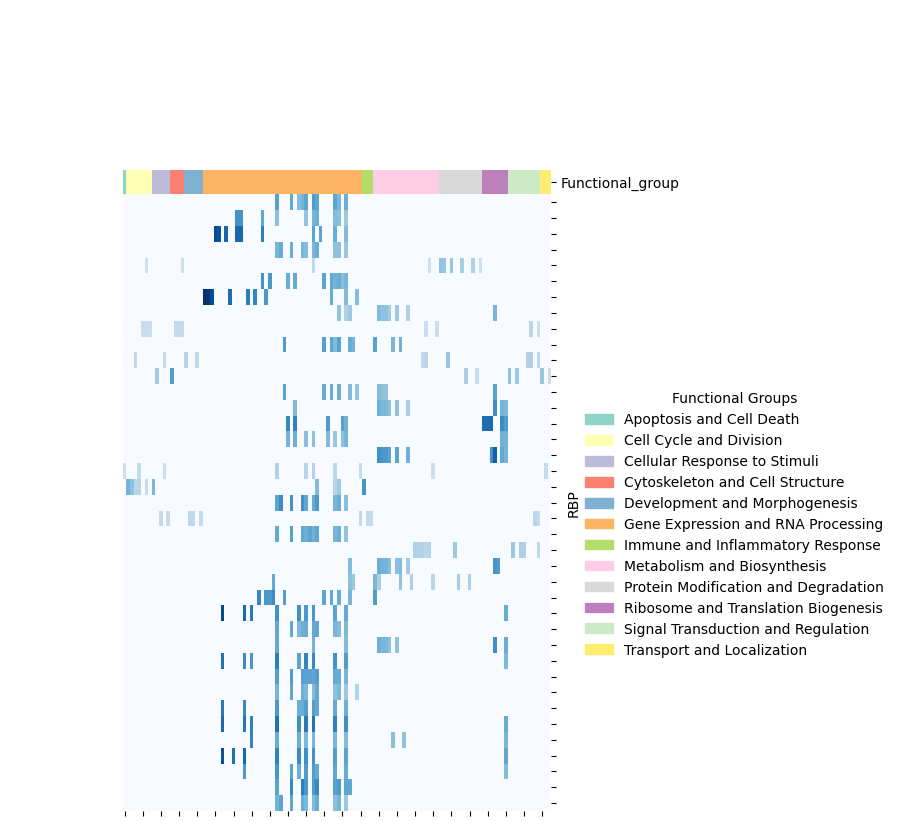

In [36]:
build_heatmap_swapped(to_plot.reset_index(), 'Odds ratio', True)